In [26]:
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


In [27]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)
X, y = mnist.data, mnist.target
print(X.shape)
print(y.shape)


(70000, 784)
(70000,)


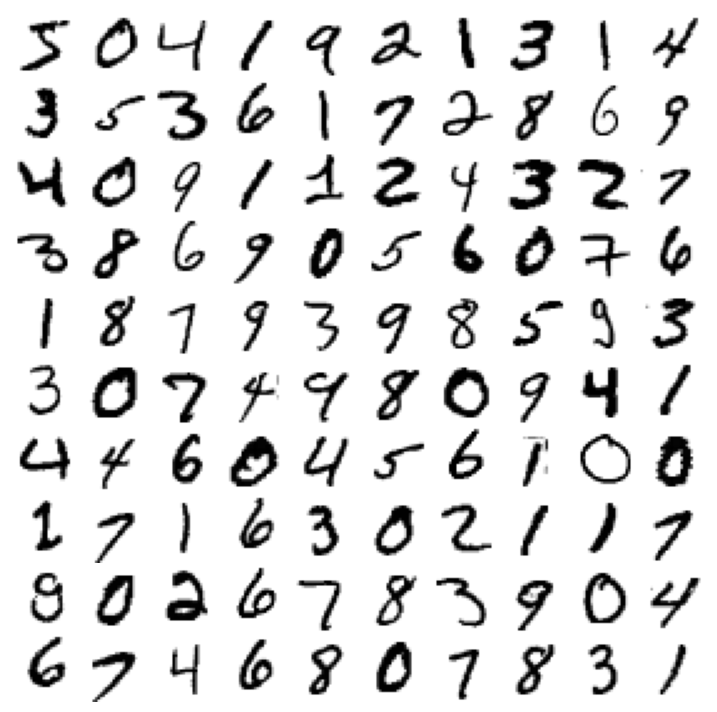

In [28]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()


In [29]:

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]


In [30]:
y_train_2 = (y_train == '2')  
y_test_2 = (y_test == '2')

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=46)
sgd_clf.fit(X_train, y_train_2)


SGDClassifier(random_state=46)

In [31]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_2, cv=3, scoring="accuracy")


array([0.96815, 0.97025, 0.96895])

In [32]:

from sklearn.metrics import confusion_matrix
y_test_2_pred = sgd_clf.predict(X_test)
cm = confusion_matrix(y_test_2, y_test_2_pred)
cm


array([[8827,  141],
       [ 106,  926]])

# Homework Question 1

Write Python code using sklearn.metrics to obtain (1) precision, (2) recall, and (3) f1-score. Then validate the value using the formulas from the lecture notes. You can do the calculation either with Python code or by using mathematics in a Text cell.

`Part 1: Calculation of Precision,Recall, F1 Score`

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test_2, y_test_2_pred)
recall = recall_score(y_test_2, y_test_2_pred)
f1 = f1_score(y_test_2, y_test_2_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.8678537956888472
Recall: 0.8972868217054264
F1 Score: 0.8823249166269652


# Homework Question 1
`Part 2: Calculation of Precision,Recall, F1 Score using python`

In [34]:
TP = cm[1, 1]  # True Positives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

precision_manual = TP / (TP + FP)
recall_manual = TP / (TP + FN)
f1_manual = 2 * (precision_manual * recall_manual) / (precision_manual + recall_manual)

print(f"Manual Precision: {precision_manual}")
print(f"Manual Recall: {recall_manual}")
print(f"Manual F1 Score: {f1_manual}")

Manual Precision: 0.8678537956888472
Manual Recall: 0.8972868217054264
Manual F1 Score: 0.8823249166269652


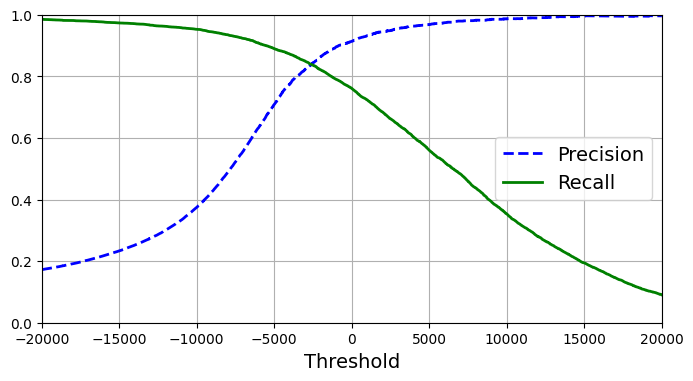

In [35]:

from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3,
                             method="decision_function")
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_2, y_scores)

plt.figure(figsize=(8, 4))  # comment: it's just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.axis([-20000, 20000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")
plt.show()


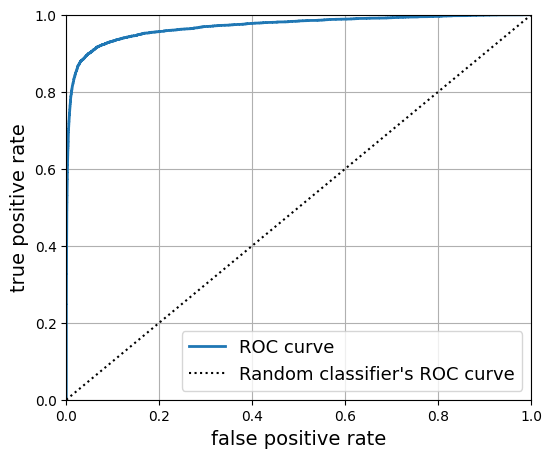

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_2, y_scores)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
plt.show()


In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_2, y_scores)


np.float64(0.9701808394174889)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
X_test_scaled = scaler.fit_transform(X_test.astype("float64"))

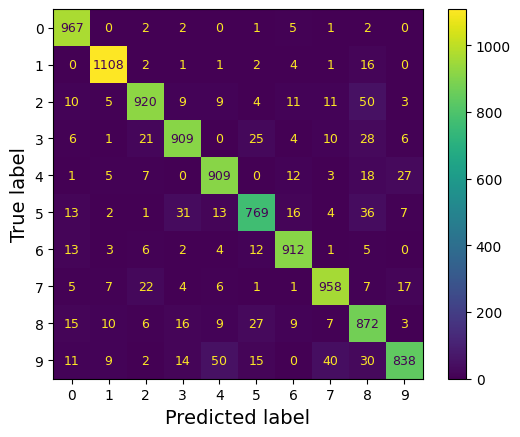

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
sgd_clf.fit(X_train_scaled, y_train)
y_test_pred = sgd_clf.predict(X_test_scaled)
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()


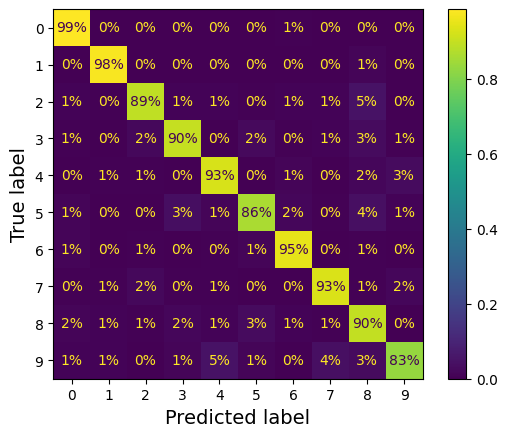

In [40]:
plt.rc('font', size=10)
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred,
                                        normalize="true", values_format=".0%")
plt.show()


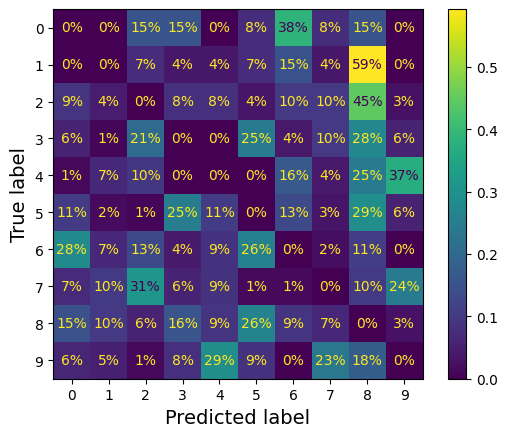

In [41]:
sample_weight = (y_test_pred != y_test)
plt.rc('font', size=10) 
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
plt.show()


# Homework Question 2 below


Train Ridge Classifier:

In [42]:
from sklearn.linear_model import RidgeClassifier

ridge_clf = RidgeClassifier()
ridge_clf.fit(X_train_scaled, y_train)

y_test_pred_ridge = ridge_clf.predict(X_test_scaled)

Generate a Confusion Matrix:

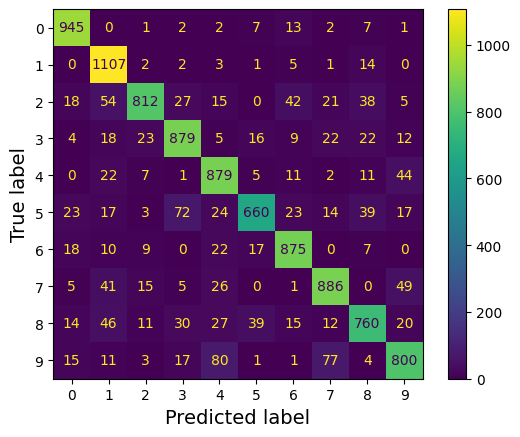

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_ridge)
plt.show()

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate all evaluation metrics
accuracy_ridge = accuracy_score(y_test, y_test_pred_ridge)
precision_ridge = precision_score(y_test, y_test_pred_ridge, average="weighted")
recall_ridge = recall_score(y_test, y_test_pred_ridge, average="weighted")
f1_ridge = f1_score(y_test, y_test_pred_ridge, average="weighted")

# Print the results
print(f"Accuracy (Ridge Classifier): {accuracy_ridge}")
print(f"Precision (Ridge Classifier): {precision_ridge}")
print(f"Recall (Ridge Classifier): {recall_ridge}")
print(f"F1 Score (Ridge Classifier): {f1_ridge}")

Accuracy (Ridge Classifier): 0.8603
Precision (Ridge Classifier): 0.8618999462894206
Recall (Ridge Classifier): 0.8603
F1 Score (Ridge Classifier): 0.8588674756497103


Performance Evaluation:
`Use accuracy_score, precision_score, recall_score, and f1_score for evaluation.`

In [45]:
from sklearn.metrics import classification_report

print("SGD Classifier Report:")
print(classification_report(y_test, y_test_pred))

print("Ridge Classifier Report:")
print(classification_report(y_test, y_test_pred_ridge))

SGD Classifier Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.92      0.90      0.91      1010
           4       0.91      0.93      0.92       982
           5       0.90      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.92      0.93      0.93      1028
           8       0.82      0.90      0.86       974
           9       0.93      0.83      0.88      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.91     10000
weighted avg       0.92      0.92      0.92     10000

Ridge Classifier Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       980
           1       0.83      0.98      0.90      1135
           2       0.92      0